In [23]:
import os
import charts_function_list, date_functions
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from calendar import isleap

In [2]:
_, data, outputs = charts_function_list.folder_setup()

In [4]:
os.chdir(data)
statehood = pd.read_csv('statehood.csv')

In [24]:
statehood['Date Admitted'] = pd.to_datetime(statehood['Date Admitted'])

In [26]:
def date_as_float(dt_):
        size_of_day = 1. / 366.
        size_of_second = size_of_day / (24. * 60. * 60.)
        days_from_jan1 = dt_ - datetime(dt_.year, 1, 1)
        if not isleap(dt_.year) and days_from_jan1.days >= 31+28:
            days_from_jan1 += timedelta(1)
        return days_from_jan1.days * size_of_day + days_from_jan1.seconds * size_of_second

In [32]:
statehood['Month Fraction']=statehood['Date Admitted'].apply(date_as_float)

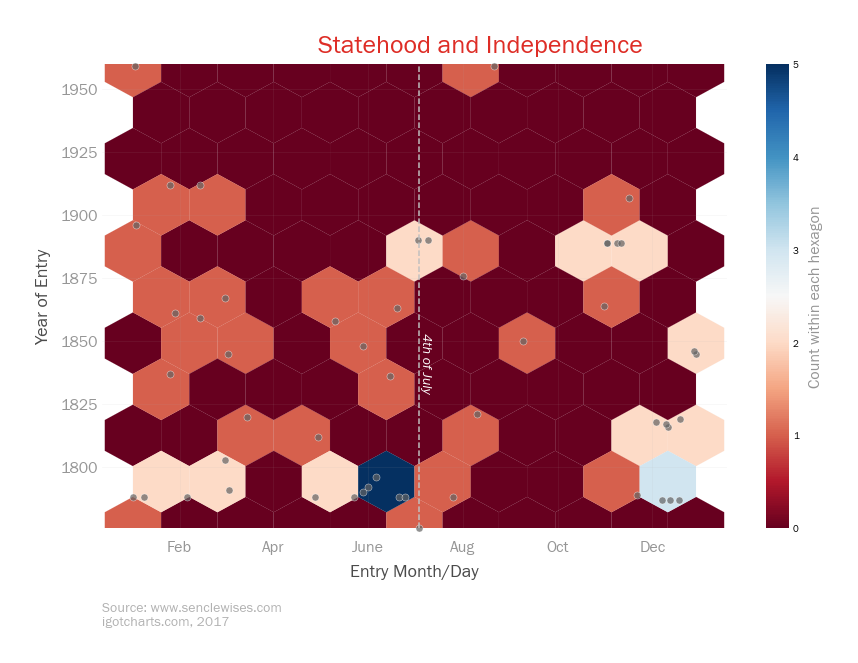

In [204]:
my_chart = charts_function_list.chart_maker(title='Statehood and Independence')
fig = my_chart.initial_fig_axis((14,8))
fig.suptitle(my_chart.title,color='#de2d26',size=26)
fig.subplots_adjust(top=.93)
ax = my_chart.axes_set_up(fig)

ax.scatter(statehood['Month Fraction'],statehood['Year'],color='#636363',zorder=2,alpha=.7,clip_on=False,linewidth=.5,s=50,edgecolors='white')
plt.hexbin(statehood['Month Fraction'],statehood['Year'],gridsize=10,cmap='RdBu',zorder=1,linewidths=.1)
cb = plt.colorbar()
cb.set_label('Count within each hexagon',fontsize=16,color='#969696')

ax.vlines(x=0.505464480874317,ymin=1776,ymax=1960,linestyles='--',color='silver')
ax.set_ylim(1776,1960)
ax.set_ylabel('Year of Entry',fontsize=18,alpha=.7)
ax.set_xlabel('Entry Month/Day',fontsize=18,alpha=.7)
ax.set_xticks([date_as_float(pd.to_datetime(str(x)+'-1-2015'))for x in [2,4,6,8,10,12]])
ax.set_xticklabels(['Feb','Apr','June','Aug','Oct','Dec'],position=(.5,-.02))
ax.text(.507,1850,'4th of July',style='italic',color='white',rotation=-90,fontsize=14)
my_chart.citations(ax,source=statehood.columns[6],source_y=-.18,chart_tag_y=-.21,chart_tag='igotcharts.com, 2017',color='black',alpha=.3)
#for item in range(len(statehood)):
 #   ax.text(statehood['Month Fraction'][item]+.02,statehood['Year'][item]+.1,statehood['State'][item],
  #          color='White')
my_chart.tick_params_(ax)
plt.show()

In [197]:
statehood.columns[6]

'Source: www.senclewises.com'